In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\ashkan\Downloads\diabetes_unclean.csv")
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,M,55.0,NaN,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,NaN,5.7,4.0,0.9,3.3,1.8,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,NaN,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [6]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [7]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [9]:
df.rename(columns = {'No_Pation':'Patients_No'}, inplace = True)
df.columns

Index(['ID', 'Patients_No', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol',
       'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [10]:
df.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            1
Urea           1
Cr             2
HbA1c          3
Chol           2
TG             2
HDL            1
LDL            2
VLDL           1
BMI            0
CLASS          0
dtype: int64

In [11]:
#Replace the missing values in the column 'HbA1c'
mean_value = df['HbA1c'].mean()
mean_value

8.284155069582505

In [12]:
df['HbA1c'].fillna(mean_value, inplace = True)

In [13]:
df.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            1
Urea           1
Cr             2
HbA1c          0
Chol           2
TG             2
HDL            1
LDL            2
VLDL           1
BMI            0
CLASS          0
dtype: int64

In [14]:
df1 = df.dropna()
df1.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            0
Urea           0
Cr             0
HbA1c          0
Chol           0
TG             0
HDL            0
LDL            0
VLDL           0
BMI            0
CLASS          0
dtype: int64

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           997 non-null    int64  
 1   Patients_No  997 non-null    int64  
 2   Gender       997 non-null    object 
 3   AGE          997 non-null    float64
 4   Urea         997 non-null    float64
 5   Cr           997 non-null    float64
 6   HbA1c        997 non-null    float64
 7   Chol         997 non-null    float64
 8   TG           997 non-null    float64
 9   HDL          997 non-null    float64
 10  LDL          997 non-null    float64
 11  VLDL         997 non-null    float64
 12  BMI          997 non-null    float64
 13  CLASS        997 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 116.8+ KB


In [17]:
df1.groupby('CLASS')['CLASS'].agg('count')

CLASS
N     102
N       1
P      53
Y     832
Y       9
Name: CLASS, dtype: int64

In [18]:
#Check for the unique values in the column 'CLASS'
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [19]:
#To clean the column, I replace the unique values
df1['CLASS']= df1['CLASS'].str.replace('Y ', 'Y')
df1['CLASS'] = df1['CLASS'].str.replace('N ', 'N')

C:\Users\ashkan\AppData\Local\Temp\ipykernel_6616\1933301555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CLASS']= df1['CLASS'].str.replace('Y ', 'Y')
C:\Users\ashkan\AppData\Local\Temp\ipykernel_6616\1933301555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CLASS'] = df1['CLASS'].str.replace('N ', 'N')


In [20]:
df1['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

C:\Users\ashkan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cr'>

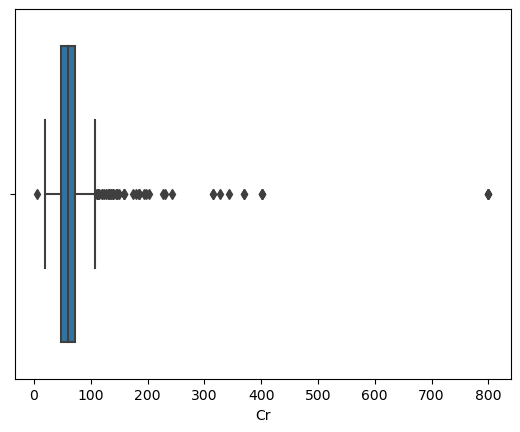

In [21]:
#Checking for outliers in the dataset
sns.boxplot(df1['Cr'])

In [22]:
#Choose the maximum quantle to fill in the outliers
max_cr = df1['Cr'].quantile(0.995)
max_cr

401.0

In [23]:
df1[df1['Cr']> max_cr]

,ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
273,1,34325,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
283,266,24060,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
846,1,34325,M,56.0,20.8,800.0,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
860,19,51623,M,60.0,20.8,800.0,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Y


In [24]:
#Assining the new data to a new dataframe
df2 = df1[df1['Cr']< max_cr]

<AxesSubplot:xlabel='Cr'>

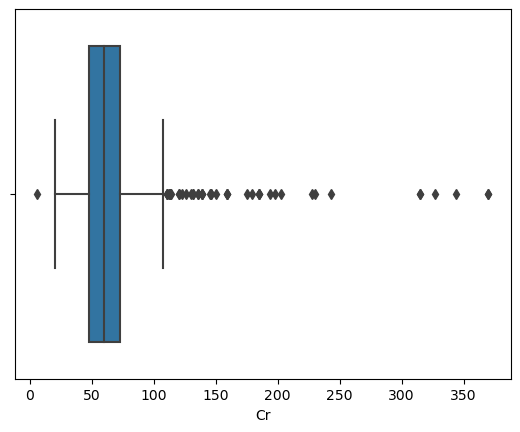

In [27]:
sns.boxplot(df2['Cr'])

C:\Users\ashkan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HbA1c'>

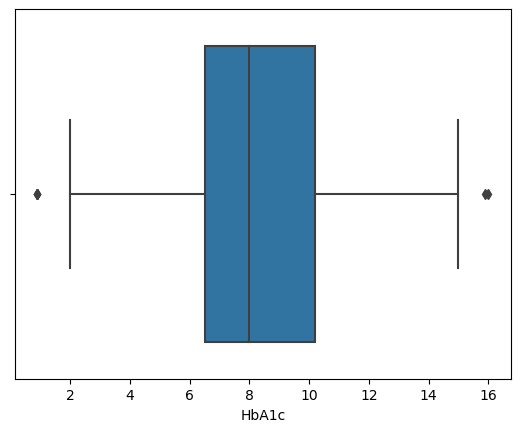

In [28]:
#Cheking for outliers in 'HbA1c' column
sns.boxplot(df2['HbA1c'])

In [29]:
#Cheking for duplicate values
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1002     True
1003     True
1005    False
1007    False
1008     True
Length: 990, dtype: bool

In [30]:
df3 = df2.drop_duplicates()

In [31]:
df3.duplicated().sum()

0

In [32]:
#Saving the new dataset into a csv file
df3.to_csv('Cleaned_data2.csv')